# DataFrame Imports

In [1]:
#First import the tools & Libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer


In [2]:
#Import the TRAINING data

training = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/train.csv')
training.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
#Import the SampleSub

samplesub = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/sample_sub_reg_origin.csv')
samplesub.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


In [4]:
# Import the TEST Data
testing = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-2/datasets/test.csv')
testing.head()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
#Find the mean of the 'SalePrice' column on the traning (dateframe = df)
training['SalePrice'].mean()

181469.70160897123

In [6]:
#Add the mean saleprice column to the testing dataset column

testing['SalePrice'] = training['SalePrice'].mean()
testing.head()

#succesful column add as we can see the 'SalePrice' at the end

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,181469.701609
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,181469.701609
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,181469.701609
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,181469.701609
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,181469.701609


In [7]:
#To make a new data frame of ONLY Id & SalePrice we will use the double brackets
testing[['Id', 'SalePrice']]

,Id,SalePrice
0,2658,181469.701609
1,2718,181469.701609
2,2414,181469.701609
3,1989,181469.701609
4,625,181469.701609
...,...,...
873,1662,181469.701609
874,1234,181469.701609
875,1373,181469.701609
876,1672,181469.701609


# EDA

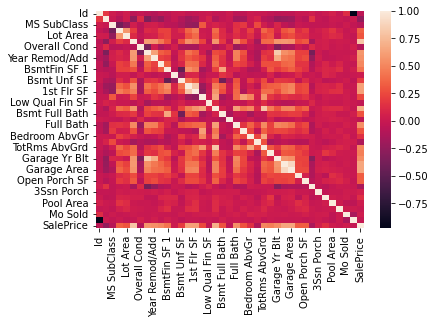

In [8]:
#See correlation model of the training set to help choose with features to try in the model

sns.heatmap(training.corr());



In [9]:
#These are the features I would like to try first
#Then increase or decrease as I go along

#Lot Area, BsmtFin SF 1 , 1st Flr SF, 2nd Flr SF, Full Bath, 
# Garage Area, Bedroom AbvGr, Kitchen AbvGr, Wood Deck SF, 
#Open Porch SF, Pool Area
# 
# SN: Catergorical -columns 40-43, 16, 17, 28-29,   

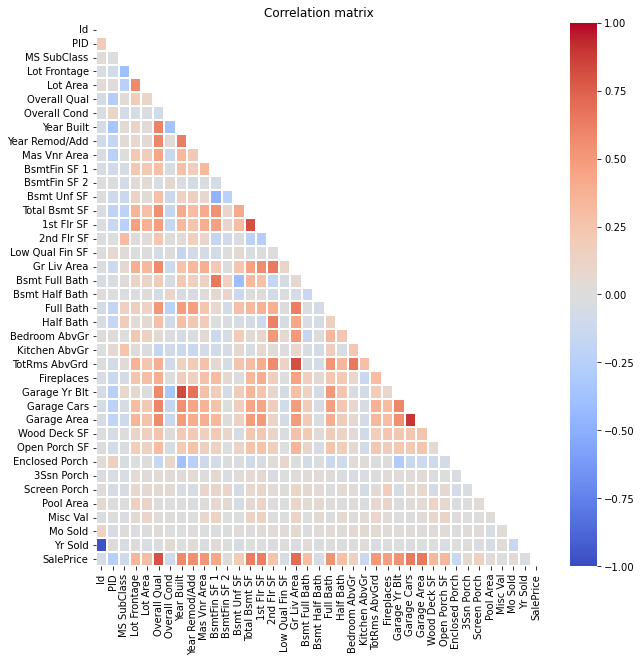

In [10]:
#Create a correlation Matrix for the features

mask = np.zeros_like(training.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(
    training.corr(),
    cmap='coolwarm',
    annot=False,
    mask=mask,
    vmin=-1.,
    vmax=1.,
    linewidths=.1,
    center=0
)

plt.title('Correlation matrix'); 



In [11]:
#Establish our X & y for train-test-split (tts)

X = training[['Lot Area','Overall Qual', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
'1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',   
'Full Bath', 'Half Bath', 'Bedroom AbvGr',  
'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF','Open Porch SF',         
'Screen Porch'
]]

y = training['SalePrice']

In [12]:
#Performed tts
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=444)

In [13]:
#Imported SimpleImputer to fill missive values by 'mean'

si = SimpleImputer(strategy='mean')

In [14]:
#Fit & transform training data

X_train_filled = si.fit_transform(X_train, y_train)

In [15]:
X_test_filled = si.transform(X_test)

In [16]:
X_train_filled = pd.DataFrame(X_train_filled, columns=X_train.columns)
X_train_filled.head()

,Lot Area,Overall Qual,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Screen Porch
0,12929.0,6.0,697.0,384.0,1081.0,1081.0,0.0,1081.0,1.0,1.0,0.0,3.0,5.0,0.0,1.0,401.0,36.0,82.0,0.0
1,2544.0,7.0,368.0,190.0,600.0,600.0,600.0,1200.0,1.0,2.0,1.0,2.0,4.0,0.0,2.0,480.0,0.0,172.0,0.0
2,9170.0,5.0,698.0,420.0,1214.0,1214.0,0.0,1214.0,1.0,1.0,0.0,2.0,6.0,0.0,2.0,461.0,0.0,0.0,0.0
3,9100.0,5.0,0.0,742.0,742.0,779.0,0.0,935.0,0.0,1.0,0.0,2.0,4.0,0.0,1.0,308.0,0.0,0.0,0.0
4,8883.0,7.0,608.0,0.0,929.0,946.0,927.0,1873.0,1.0,2.0,1.0,3.0,7.0,1.0,2.0,619.0,108.0,48.0,144.0


In [17]:
ss = StandardScaler()

In [18]:
X_train_filled_ss = ss.fit_transform(X_train)

In [19]:
X_test_filled_ss = ss.transform(X_test_filled)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
linreg = LinearRegression()

In [21]:
type(X_train_filled)

pandas.core.frame.DataFrame

In [22]:
#df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)

In [23]:
linreg.fit(X_train_filled, y_train)

LinearRegression()

In [24]:
cross_val_score(linreg, X_train_filled, y_train)

array([0.83782544, 0.85817099, 0.81930884, 0.87353177, 0.65593736])

In [25]:
cross_val_score(linreg, X_test_filled, y_test)

array([0.80964334, 0.75798135, 0.78017352, 0.75661745, 0.03171298])

In [26]:
#Treat the testing data of how i cleaned and treated the training
testing[['Lot Area','Overall Qual', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
'1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',   
'Full Bath', 'Half Bath', 'Bedroom AbvGr',  
'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF','Open Porch SF',         
'Screen Porch'
]]

,Lot Area,Overall Qual,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Screen Porch
0,9142,6,0,1020,1020,908,1020,1928,0,2,0,4,9,0,1,440,0,60,0
1,9662,5,0,1967,1967,1967,0,1967,0,2,0,6,10,0,2,580,170,0,0
2,17104,7,554,100,654,664,832,1496,1,2,1,3,7,1,2,426,100,24,0
3,8520,5,0,968,968,968,0,968,0,1,0,2,5,0,2,480,0,0,0
4,9500,6,609,785,1394,1394,0,1394,1,1,1,3,6,2,2,514,0,76,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,8000,6,931,0,1084,1084,793,1877,1,2,1,4,8,1,2,488,0,96,0
874,14670,6,575,529,1104,1104,884,1988,0,2,1,4,9,1,2,480,0,230,0
875,8250,5,250,210,952,1211,0,1211,0,1,0,3,5,1,1,322,0,63,0
876,9000,4,616,248,864,864,0,864,0,1,0,3,5,0,2,528,0,0,0


In [27]:
#set up the predictions

linreg_preds =linreg.predict(testing[['Lot Area','Overall Qual', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
'1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',   
'Full Bath', 'Half Bath', 'Bedroom AbvGr',  
'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF','Open Porch SF',         
'Screen Porch']])

linreg_preds

array([175726.5894583 , 176499.81071385, 208109.95059747, 114919.56948205,
       202066.38220783,  74467.4933103 ,  86633.26143982, 125787.1612501 ,
       189136.03308021, 179793.00745398, 163383.3586535 , 132763.49284412,
       166397.95064872, 300610.83559001, 176000.86158622, 102290.17941767,
       195336.42686941, 125102.64627862, 222718.38558095, 219402.14612513,
       125846.19300017, 125573.82696759, 202937.80972644, 182575.17842452,
       178577.0370595 ,  98038.05045552, 115776.55559667, 129389.73311483,
       156938.14741708,  21562.91985322,  93270.54174786,  90844.92058761,
       259819.38044062, 150570.6659847 , 215494.30151733, 175196.98249781,
       111964.81526107,  64794.30504828,  86133.01911002, 187909.90296794,
       143888.81898611, 211896.12606234, 149473.78977632, 171284.50424586,
       230895.3053176 ,  72010.84075564, 222702.2385918 , 120434.1978397 ,
       120730.74100478, 127318.5926171 , 119119.19315965, 237740.26852425,
       251829.31811154, 1

In [28]:
lasso = Lasso(alpha=.01)

In [29]:
lasso.fit(X_train_filled, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.448e+11, tolerance: 9.741e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [36]:
lasso_preds = lasso.predict(testing[['Lot Area','Overall Qual', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
'1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',   
'Full Bath', 'Half Bath', 'Bedroom AbvGr',  
'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF','Open Porch SF',         
'Screen Porch']])

lasso_preds

array([175726.69541399, 176499.88172612, 208109.82082481, 114919.58765919,
       202066.27665197,  74467.52328233,  86633.30759604, 125787.18743061,
       189136.09684921, 179792.98183029, 163383.3558819 , 132763.50324734,
       166397.98238272, 300610.60176487, 176000.89666956, 102290.20447142,
       195336.43424539, 125102.64653121, 222718.34137126, 219402.1800179 ,
       125846.1828763 , 125573.88120333, 202937.77384188, 182575.12436912,
       178577.04439271,  98038.13462222, 115776.60520018, 129389.83057461,
       156938.16090718,  21562.88402618,  93270.66792621,  90844.71810565,
       259819.4910209 , 150570.67733172, 215494.31025723, 175197.03274955,
       111964.86194698,  64794.3458905 ,  86133.0559537 , 187909.97120963,
       143888.7865475 , 211896.04283327, 149473.80590206, 171284.46727966,
       230895.25256327,  72010.82890819, 222702.19327482, 120434.21864832,
       120730.7458419 , 127318.56175613, 119119.24314627, 237740.3608135 ,
       251829.32611742, 1

In [38]:
lasso.score(X_train_filled, y_train)

0.8224651431288503

In [39]:
lasso.score(X_test_filled, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


0.7348953201588773

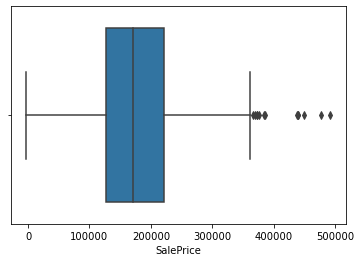

In [41]:
#Lasso BoxPlot
sns.boxplot(x=testing['SalePrice']);

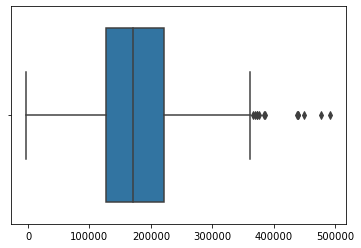

In [43]:
#linear Regress Boxplot
sns.boxplot(x=lasso_preds);

In [31]:
#Make it equal to the testing 'SalePrice' column

testing['SalePrice'] =lasso_preds

In [32]:
#Check if columns are good for submission
#153_300.603994
testing[['Id', 'SalePrice']]

,Id,SalePrice
0,2658,175726.695414
1,2718,176499.881726
2,2414,208109.820825
3,1989,114919.587659
4,625,202066.276652
...,...,...
873,1662,207784.838724
874,1234,206210.174130
875,1373,116849.276263
876,1672,91194.923730


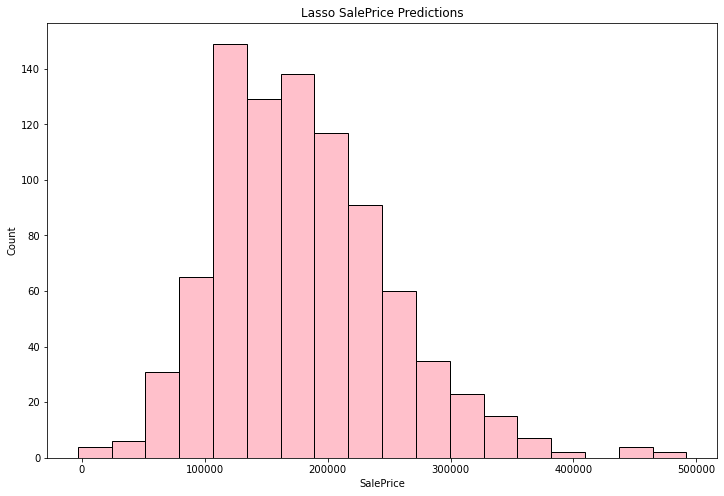

In [44]:
plt.figure(figsize = (12, 8))   

plt.hist(testing['SalePrice'], color ='pink', bins=18, ec = 'black');

plt.title('Lasso SalePrice Predictions');
plt.xlabel('SalePrice')
plt.ylabel('Count');

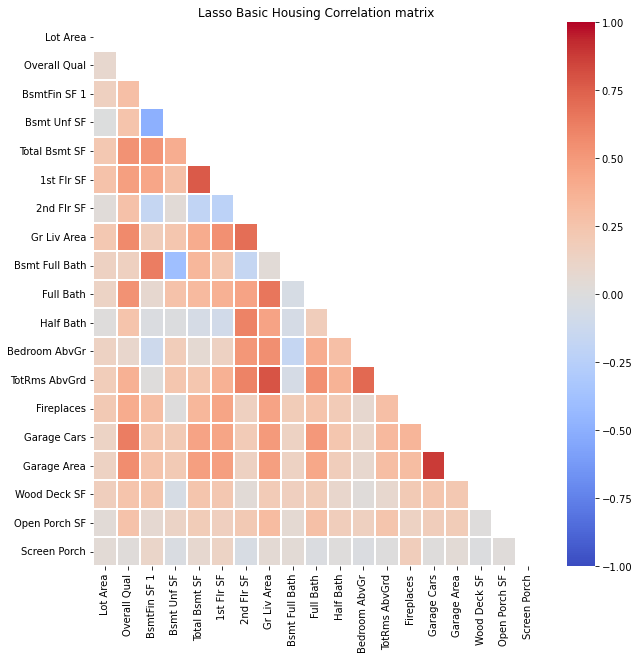

In [49]:
#Correlation Matrix
mask = np.zeros_like(testing[['Lot Area','Overall Qual', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
'1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',   
'Full Bath', 'Half Bath', 'Bedroom AbvGr',  
'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF','Open Porch SF',         
'Screen Porch']].corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap((
    testing[['Lot Area','Overall Qual', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
'1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',   
'Full Bath', 'Half Bath', 'Bedroom AbvGr',  
'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF','Open Porch SF',         
'Screen Porch']].corr()),
    cmap='coolwarm',
    annot=False,
    mask=mask,
    vmin=-1.,
    vmax=1.,
    linewidths=.1,
    center=0
)

plt.title('Lasso Basic Housing Correlation matrix'); 


In [37]:
#Submit to Kaggle #$30,891

testing[['Id', 'SalePrice']].to_csv('Basic_Lasso_.5F.csv', index=False)

In [34]:
#Create this into an csv & submit to Kaggle

#X_test_filled[['Id', 'SalePrice']].to_csv('Bas_tts-Lass-12F.csv', index = False)

In [35]:
#Only submitting y predictions, so only 
#Take a df and make it csv